###  what is the objective of this project?
* To analyze and answer business questions aout 12 months worth of sales data 
* data cleaning, manipulation, read csv file, concatenate files, visualize results using matplotlib
* help make business decisions to optimize sales, 

### Sales Analysis
import necessary libraries 

In [1]:
import pandas as pd
import os

In [12]:
# to find the current working directory, we need this to find the path which is later used in reading csv file 
cd = os.getcwd()
print(cd)
path = r'/Users/binitachhetri/Desktop/DataScience/AnalysisProject'

/Users/binitachhetri/Desktop/DataScience/AnalysisProject


#### Merging 12 months of datas into a single file 
* Starting by reading one csv to make sure we are in track
## pseudo code for merging csv file:
* make a new dataframe() /df
* for file ending in .csv in the working directory:
    * concat file
    * add file to df
    * convert the df to csv


In [2]:
import os
import pandas as pd
path = r'/Users/binitachhetri/Desktop/DataScience/AnalysisProject'

files = [file for file in os.listdir(path) if file.endswith('.csv')]

all_months_data = pd.DataFrame()
for file in files:
    file_path = os.path.join(path, file)  # Join directory path and file name
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('data.csv', index=False)

In [3]:
all_data = pd.read_csv("data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Add a new column in data 
** We want to add a new coulmn Month 

In [9]:
#all_data['Month'] = 3
all_data['Month'] = all_data['Order Date'].str[0:2]  #starts at 0 and ends at 2, not including 2. 
all_data['Month'] = all_data ['Month'].astype('int32')  # changing the datatype of Month from string to integer
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


## Find Or and delete it


In [46]:
##removing any rows that have Or value in order date coulumn 

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


## Clean up the data!
** How to clean and drop rows or columns with null NAN values
** Sometimes there can be only 1 or 2 NaN values in thousands of rows. #all_data.head(100) <- this may not help!

### Drop rows NaN

In [6]:
# find the rows with NAN value 
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

# Drop the rows with NAN value
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


## Convert datatype
** We wanted to create a new column called sales where we mulitply two coulumns and generate a value. But for that we will. need to convert the strinf type to integers. 

In [47]:
# how to convert a string value to an integer or numeric; to_numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors = 'coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors = 'coerce')
'''So initially i wasnt able to convert the Quantity Ordered to numeric because 
there were NAN values in that column that were not dropped yet, once we drop them, it 
should work without the parameter errors = 'coerce' '''

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [48]:
# make a column that has the sales amount; quantity*price each
all_data['Sales']= all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",12,11.96


### Task 4: Add a city coulmn 

In [110]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
#all_data = all_data.drop(columns = 'Column')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


### Question1: What month had the highest sale? What was the earning of that month?
** From the output below we can see that the month December had the higest earning of $9226886.68

In [49]:
results = all_data.groupby('Month').sum()
results
#from the output below, we can tell that the month december had the most sales. 

/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_20543/212231435.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,21806,3623536.76,3644513.46
2,26898,4377769.44,4404044.84
3,34010,5582415.66,5614200.76
4,41116,6735342.04,6781340.48
5,37334,6270250.26,6305213.50
6,30506,5124051.22,5155604.52
7,32144,5265079.12,5295551.52
8,26896,4460690.84,4488935.76
9,26218,4169984.18,4195120.26


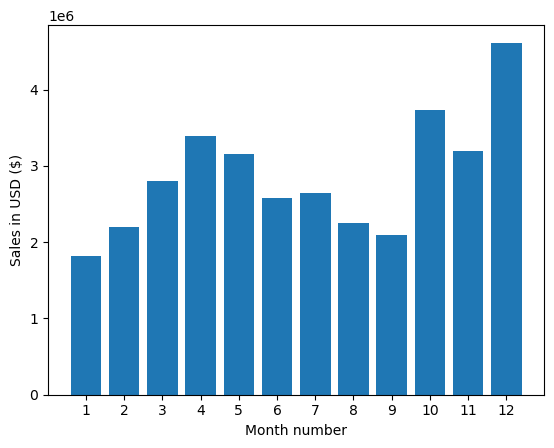

In [112]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

 ### Question 2  What US city had the highest number of sales?
 ** From the output and graph below we can tell that the Sanfransico city had the highest earnings.

In [113]:

results = all_data.groupby('City').sum()
results

/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_18142/2345149330.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602.0,2779908.20,104794,2795498.58,214264,442932
Austin (TX),11153.0,1809873.61,69829,1819581.75,141946,289060
Boston (MA),22528.0,3637409.77,141112,3661642.01,288225,590442
Dallas (TX),16730.0,2752627.82,104620,2767975.40,214390,435155
Los Angeles (CA),33289.0,5421435.23,208325,5452570.80,427444,866638
New York City (NY),27932.0,4635370.83,175741,4664317.43,357696,733598
Portland (ME),2750.0,447189.25,17144,449758.27,35211,72856
Portland (OR),11303.0,1860558.22,70621,1870732.34,144421,295533
San Francisco (CA),50239.0,8211461.74,315520,8262203.91,643265,1319477


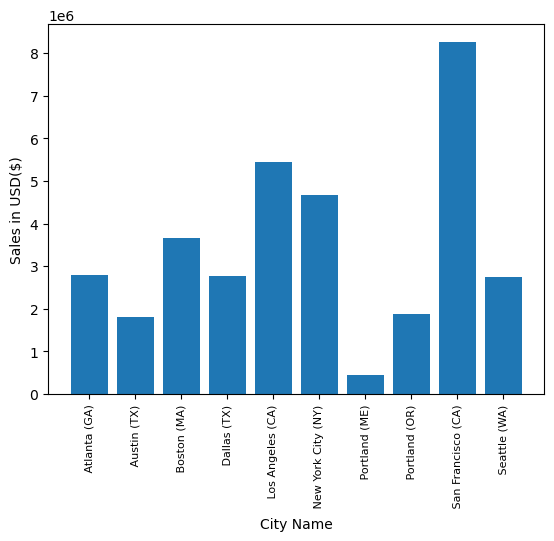

In [114]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()

### Question3 : what time should we display advertisements to maximize the likelyhood of customer's buying product?

In [64]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [68]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


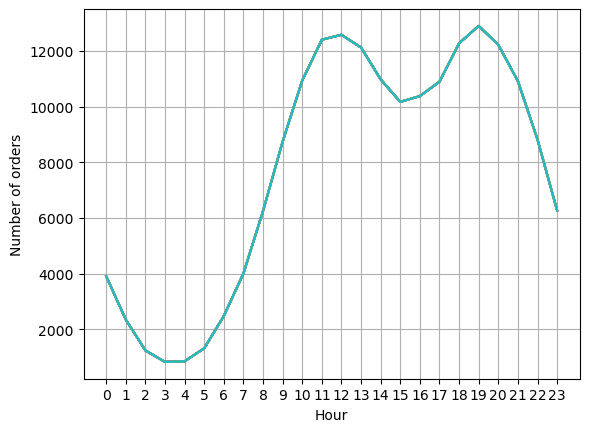

In [73]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()


## Question4 : What products are the most sold often?


In [58]:
df = all_data[all_data["Order ID"].duplicated (keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
0,295665,"Macbook Pro Laptop,Macbook Pro Laptop"
1,295666,"LG Washing Machine,LG Washing Machine"
2,295667,"USB-C Charging Cable,USB-C Charging Cable"
3,295668,"27in FHD Monitor,27in FHD Monitor"
4,295669,"USB-C Charging Cable,USB-C Charging Cable"


In [59]:
from itertools import combinations 
from collections import Counter
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for i, j in count.most_common(10):
    print(i, j)

('USB-C Charging Cable', 'USB-C Charging Cable') 22095
('Lightning Charging Cable', 'Lightning Charging Cable') 21874
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 20833
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 20717
('Wired Headphones', 'Wired Headphones') 19022
('Apple Airpods Headphones', 'Apple Airpods Headphones') 15645
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 13433
('27in FHD Monitor', '27in FHD Monitor') 7543
('iPhone', 'iPhone') 6850
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 6250


### Question: What product sold the most and why do you think it was sold the most?
** From the output below, we can see that TRipe A batteries are sold the most. They are the most sold products because they are cheaper in price and are useful for multiple electronics appliances. 

/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_18142/831430396.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


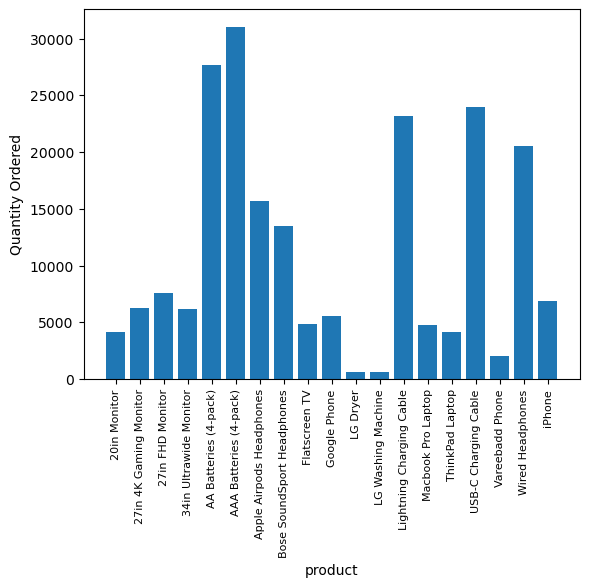

In [93]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('product
           ')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()


## Proof of the hypthesis
** From the graph below we can see the coorelation between price of the product and quantity of products being sold. 

/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_18142/3180180324.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_18142/3180180324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


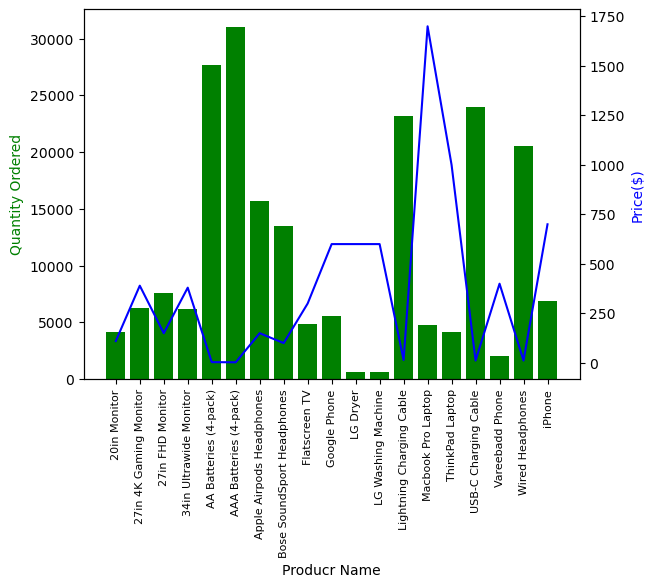

In [100]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price($)' , color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
plt.show()
